# Описание проекта
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
### Описание тарифов
#### Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
---
#### Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    -	минута разговора: 1 рубль
    -	сообщение: 1 рубль
    -	1 Гб интернет-трафика: 150 рублей


# Описание данных
#### Таблица users (информация о пользователях):
---
- user_id — уникальный идентификатор пользователя
-	first_name — имя пользователя
-	last_name — фамилия пользователя
-	age — возраст пользователя (годы)
-	reg_date — дата подключения тарифа (день, месяц, год)
-	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
-	city — город проживания пользователя
-	tariff — название тарифного плана

#### Таблица calls (информация о звонках):
---
-	id — уникальный номер звонка
-	call_date — дата звонка
-	duration — длительность звонка в минутах
-	user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):
---
-	id — уникальный номер сообщения
-	message_date — дата сообщения
-	user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):
---
-	id — уникальный номер сессии
-	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
-	session_date — дата интернет-сессии
-	user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):
---
-	tariff_name — название тарифа
-	rub_monthly_fee — ежемесячная абонентская плата в рублях
-	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
-	messages_included — количество сообщений в месяц, включённых в абонентскую плату
-	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
-	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
-	rub_per_message — стоимость отправки сообщения сверх тарифного пакета
-	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

In [3]:
print(calls_data.info())
print(calls_data.duplicated().sum())
calls_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
print(internet_data.info())
print(internet_data.duplicated().sum())
internet_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
0


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
print(messages_data.info())
print(messages_data.duplicated().sum())
messages_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
tariffs_data.rename(columns={'tariff_name': 'tariff'}, inplace=True)

print(tariffs_data.info())
tariffs_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
tariffs_data.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
print(users_data.info())
print(internet_data.duplicated().sum())
print(len(users_data['user_id'].unique())) 
users_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
0
500


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод
Типы данных столбцов, на первый взгляд, соответствуют данным в них содержащихся. За исключением, пожалуй, дат.

Кроме того, много нетарифицируемых звонков продолжительностью 0 секунд. От этих записей нужно избавиться.

Еще нам нужно округлить  время звонков и мегабайты по правилам сотового оператора - вверх.

## Предобработка данных

##### Меняем тип данных на datetime64

In [9]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')

internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')

messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')

##### Избавляемся от строк с нулевой продолжительностью звонка

In [10]:
calls_data_wht_zeros = calls_data[calls_data['duration'] != 0].reset_index(drop=True)
print(calls_data_wht_zeros.head())
print(calls_data_wht_zeros.info())

print(len(calls_data['user_id'].unique())) 
print(len(calls_data_wht_zeros['user_id'].unique()))

       id  call_date  duration  user_id
0  1000_2 2018-06-11      2.85     1000
1  1000_3 2018-09-21     13.80     1000
2  1000_4 2018-12-15      5.18     1000
3  1000_7 2018-08-22     18.31     1000
4  1000_8 2018-09-15     18.44     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB
None
492
492


Во-первых, такие звонки дейстительно бывают, когда абонент набирает и сбрасывает, чтобы ему перезвонили или когда не отвечают. Во-вторых, как мы все знаем по печальному опыту - сотовый оператор охотно возьмет денег за услуги, которые абонент не заказывал, но чтобы он не тарифицировал действительно оказанные  услуги, да еще и в таком объеме - это что-то невиданное! )))
Ну и в-третьих. Цель проекта - оценить тарифы на основе поведения клиентов и их текущих расходов. И если поддасться первому порыву и заменить звонки с нулевой продолжительностью медианой или средним значением, то получится, что мы сначала приписываем клиенту какое-то поведение, выдумываем данные, а потом их же и анализируем. Так как таких данных много, то они сильно повлияли бы на характер выборки и распределение. То есть исказили бы данные и повлияли бы на выводы.

##### Округляем продолжительность звонка и количество истраценных мегабайт вверх.

In [11]:
calls_data_wht_zeros['duration'] = np.ceil(calls_data_wht_zeros['duration'])
calls_data_wht_zeros['duration'] = calls_data_wht_zeros['duration'].astype('int')

internet_data['mb_used'] = np.ceil(internet_data['mb_used'])
internet_data['mb_used'] = internet_data['mb_used'].astype('int')


### Посчитайте для каждого пользователя:
---
###### - количество сделанных звонков и израсходованных минут разговора по месяцам

In [12]:
calls_data_wht_zeros['month'] = pd.DatetimeIndex(calls_data_wht_zeros['call_date']).month  #добавлем в таблицу месяц звонка

calls_minutes_per_month = calls_data_wht_zeros.pivot_table(index=('user_id', 'month'), values='duration', aggfunc=['count', 'sum'])
calls_minutes_per_month.columns = ['number_of_calls', 'total_duration']
calls_minutes_per_month = calls_minutes_per_month.reset_index()
print(calls_minutes_per_month.info())
calls_minutes_per_month.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 4 columns):
user_id            3168 non-null int64
month              3168 non-null int64
number_of_calls    3168 non-null int64
total_duration     3168 non-null int64
dtypes: int64(4)
memory usage: 99.1 KB
None


,user_id,month,number_of_calls,total_duration
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


###### - количество отправленных сообщений по месяцам

In [13]:
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month  #добавлем в таблицу месяц сообщения

messages_per_month = messages_data.pivot_table(index=('user_id', 'month'), values='id', aggfunc='count')
messages_per_month.columns = ['total_messages']
messages_per_month = messages_per_month.reset_index()
messages_per_month.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id           2717 non-null int64
month             2717 non-null int64
total_messages    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB
None


,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


###### - объем израсходованного интернет-трафика по месяцам

In [14]:
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month  #добавлем в таблицу месяц звонка

traffic_per_month = internet_data.pivot_table(index=('user_id', 'month'), values='mb_used', aggfunc='sum')
traffic_per_month.columns = ['total_traffic']
traffic_per_month = traffic_per_month.reset_index()
traffic_per_month.head()

,user_id,month,total_traffic
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


- ###### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

##### Объединим полученные среднемесячные таблицы в одну общую с данными по каждому пользователю и по месяцам.

In [15]:
complete_data = calls_minutes_per_month.merge(messages_per_month, how='outer')
complete_data = complete_data.merge(traffic_per_month, how='outer')


In [16]:
print(complete_data.info())
complete_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id            3214 non-null int64
month              3214 non-null int64
number_of_calls    3168 non-null float64
total_duration     3168 non-null float64
total_messages     2717 non-null float64
total_traffic      3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB
None


,user_id,month,number_of_calls,total_duration,total_messages,total_traffic
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0


In [17]:
complete_data = complete_data.merge(users_data.loc[:, ['user_id', 'age', 'city', 'tariff']], on='user_id') #, how='outer')

print(complete_data['total_traffic'].isna().sum())
complete_data.head()

11


,user_id,month,number_of_calls,total_duration,total_messages,total_traffic,age,city,tariff
0,1000,5,17.0,159.0,22.0,2256.0,52,Краснодар,ultra
1,1000,6,28.0,172.0,60.0,23257.0,52,Краснодар,ultra
2,1000,7,41.0,340.0,75.0,14016.0,52,Краснодар,ultra
3,1000,8,42.0,408.0,81.0,14070.0,52,Краснодар,ultra
4,1000,9,46.0,466.0,57.0,14581.0,52,Краснодар,ultra


##### Избавимся от появившихся NaN в столбцах number_of_calls,  total_duration,  total_messages, total_traffic
Тут все просто. Если клиент не звонил или не отправлял сообщений, то можем спокойно менять на 0. И заодно приведем столбцы с числом сообщений и звонков к int

In [18]:
complete_data['number_of_calls'] = complete_data['number_of_calls'].fillna(0)
complete_data['number_of_calls'] = complete_data['number_of_calls'].astype('int')

complete_data['total_duration'] = complete_data['total_duration'].fillna(0)
complete_data['total_duration'] = complete_data['total_duration'].astype('int')

complete_data['total_messages'] = complete_data['total_messages'].fillna(0)
complete_data['total_messages'] = complete_data['total_messages'].astype('int')

complete_data['total_traffic'] = complete_data['total_traffic'].fillna(0)
complete_data['total_traffic'] = complete_data['total_traffic'].astype('int')

print(complete_data.info())
complete_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
user_id            3214 non-null int64
month              3214 non-null int64
number_of_calls    3214 non-null int64
total_duration     3214 non-null int64
total_messages     3214 non-null int64
total_traffic      3214 non-null int64
age                3214 non-null int64
city               3214 non-null object
tariff             3214 non-null object
dtypes: int64(7), object(2)
memory usage: 251.1+ KB
None


,user_id,month,number_of_calls,total_duration,total_messages,total_traffic,age,city,tariff
0,1000,5,17,159,22,2256,52,Краснодар,ultra
1,1000,6,28,172,60,23257,52,Краснодар,ultra
2,1000,7,41,340,75,14016,52,Краснодар,ultra
3,1000,8,42,408,81,14070,52,Краснодар,ultra
4,1000,9,46,466,57,14581,52,Краснодар,ultra


Видим, что есть 2 NaN в номерах месяцев. Посмотрим что это

In [19]:
month_0 = complete_data[complete_data['month'] != complete_data['month']]
print(month_0)

Empty DataFrame
Columns: [user_id, month, number_of_calls, total_duration, total_messages, total_traffic, age, city, tariff]
Index: []


Отлично! Сплошные нули. И это 2 последние записи нашего датафрейма. Посмотрим на хвост.

In [20]:
complete_data.tail()

,user_id,month,number_of_calls,total_duration,total_messages,total_traffic,age,city,tariff
3209,1489,8,0,0,17,11066,35,Санкт-Петербург,smart
3210,1489,9,0,0,32,17232,35,Санкт-Петербург,smart
3211,1489,10,0,0,21,19588,35,Санкт-Петербург,smart
3212,1489,11,0,0,20,17516,35,Санкт-Петербург,smart
3213,1489,12,0,0,35,17341,35,Санкт-Петербург,smart


Просто удалим эти строки.

In [21]:
complete_data.dropna(subset=['month'], inplace=True)
complete_data['month'] = complete_data['month'].astype('int')

print(complete_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
user_id            3214 non-null int64
month              3214 non-null int64
number_of_calls    3214 non-null int64
total_duration     3214 non-null int64
total_messages     3214 non-null int64
total_traffic      3214 non-null int64
age                3214 non-null int64
city               3214 non-null object
tariff             3214 non-null object
dtypes: int64(7), object(2)
memory usage: 251.1+ KB
None


In [22]:
complete_data = complete_data.merge(tariffs_data)
complete_data.head()

,user_id,month,number_of_calls,total_duration,total_messages,total_traffic,age,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17,159,22,2256,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,28,172,60,23257,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,41,340,75,14016,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,42,408,81,14070,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,46,466,57,14581,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [23]:
import math

#Возвращает разницу, если x>lim, иначе 0
def delta_or_zero(x, lim):
    if x>lim:
        return x-lim
    else:
        return 0
    
#Добавляем новый столбец помесячных расходов каждого абонента с помощью функции    
def monthly_profit(row):
    rub_monthly_fee = row['rub_monthly_fee']
    total_duration = row['total_duration']
    total_messages = row['total_messages']
    total_traffic = row['total_traffic']
    messages_included = row['messages_included']
    mb_per_month_included = row['mb_per_month_included']
    minutes_included = row['minutes_included']
    rub_monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']

    monthly_profit = rub_monthly_fee + delta_or_zero(total_messages, messages_included) * rub_per_message \
                    + delta_or_zero(total_duration, minutes_included) * rub_per_minute \
                    + np.ceil(delta_or_zero(total_traffic, mb_per_month_included)/1024) * rub_per_gb
    return monthly_profit

complete_data['monthly_profit'] = complete_data.apply(monthly_profit, axis=1) 


In [24]:
complete_data.head()

,user_id,month,number_of_calls,total_duration,total_messages,total_traffic,age,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_profit
0,1000,5,17,159,22,2256,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,28,172,60,23257,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,41,340,75,14016,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,42,408,81,14070,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,46,466,57,14581,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0


### Вывод
Данные по звонкам, сообщениям и использованному траффику сведены в одну общую таблицу. Подсчитано количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам.
В общую таблицу добавлен столбец, где для каждого клиента подсчитана приносимая им каждый месяц выручка.

Данные подготовлены к дальнейшему анализу.

### Анализ данных
###### Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Берем срез по тарифу и смотрим по соответствующим стобцам минуты, сообщения и траффик.

In [25]:
complete_data_ultra = complete_data.loc[complete_data['tariff']=='ultra']
#print(complete_data_ultra.info())
complete_data_smart = complete_data.loc[complete_data['tariff']=='smart']
#print(complete_data_smart.info())

Тариф Ультра
total_duration
Среднее 527
Медиана 518
Дисперсия 100874
Ст.отклонение 318
total_duration
Тариф Смарт
Среднее 418
Медиана 422
Дисперсия 36219
Ст.отклонение 190
total_duration


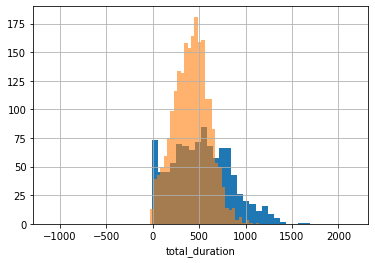

Тариф Ультра
total_messages
Среднее 49
Медиана 38
Дисперсия 2285
Ст.отклонение 48
total_messages
Тариф Смарт
Среднее 33
Медиана 28
Дисперсия 797
Ст.отклонение 28
total_messages


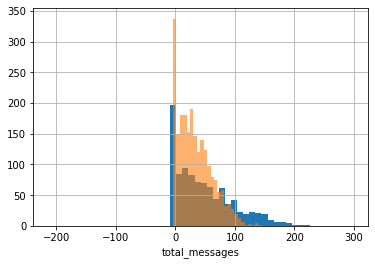

Тариф Ультра
total_traffic
Среднее 19487
Медиана 19324
Дисперсия 101935621
Ст.отклонение 10096
total_traffic
Тариф Смарт
Среднее 16229
Медиана 16531
Дисперсия 34545911
Ст.отклонение 5878
total_traffic


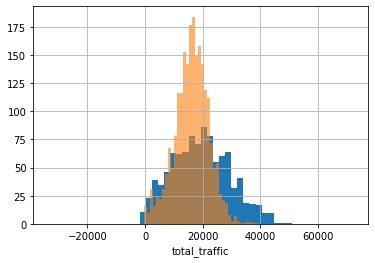

In [26]:
for argument in ['total_duration', 'total_messages', 'total_traffic']:
    
    print('Тариф Ультра')
    print(argument)
    print('Среднее {:.0f}'.format(complete_data_ultra[argument].mean()))
    print('Медиана {:.0f}'.format(complete_data_ultra[argument].median()))
    print('Дисперсия {:.0f}'.format(np.var(complete_data_ultra[argument], ddof=1)))
    print('Ст.отклонение {:.0f}'.format(np.std(complete_data_ultra[argument], ddof=1)))
    
    Q1 = np.percentile(complete_data_ultra[argument].dropna(), 25)
    Q3 = np.percentile(complete_data_ultra[argument].dropna(), 75)
    IQR = Q3 - Q1
    print(argument)
    complete_data_ultra[argument].hist(bins=50, range=(Q1-3 * IQR, Q3 + 3 * IQR))
#    plt.show()
    
    print('Тариф Смарт')
    print('Среднее {:.0f}'.format(complete_data_smart[argument].mean()))
    print('Медиана {:.0f}'.format(complete_data_smart[argument].median()))
    print('Дисперсия {:.0f}'.format(np.var(complete_data_smart[argument], ddof=1)))
    print('Ст.отклонение {:.0f}'.format(np.std(complete_data_smart[argument], ddof=1)))
    
    Q1 = np.percentile(complete_data_smart[argument].dropna(), 25)
    Q3 = np.percentile(complete_data_smart[argument].dropna(), 75)
    IQR = Q3 - Q1
    print(argument)
    complete_data_smart[argument].hist(bins=50, range=(Q1-3 * IQR, Q3 + 3 * IQR), alpha = 0.6)
    plt.xlabel(argument)
    plt.show()

In [27]:
#complete_data_ultra['total_traffic'].describe()

### Вывод
Распределение минут разговора на тарифу Ульта скошено влево. Странным выглядит то, что у 20% вообще нет голосовх вызовов.
Распределение минут разговора на тарифу Смарт почти симметрично и очень похоже на нормальное.
Распределение количества сообщений для обоих тарифов схоже. напоминает Пуассоновское. Характерно, что 20; абонентов Ультра и 15% абонентов Смарт вообще не пользуются смс. Этот тип общени постепенно уходит в прошлое.
Распределение использованнного траффика симметрично и практически представляет собой нормальное распределение. 

Для подавляющего большинства абонентов тарифа Ультра достаточно минут, сообщений и гигабайт, включенных в абонентскую плату. Все их потребности в услугах мобильной связи покрываются включенным в тариф пакетом. Только очень немногие доплачивают за дополнительный интернет, число же использованных минут разговора (медиана 518 при 3000 включенных в тариф минут) и, особенно, смс (медиана 38 при 1000 включенных в тариф) абсолютно избыточно для среднестатистического клиента.

Клиенты, использующие тариф Смарт гораздо чаще доплачивают сверх тарифа за дополнительные минуты (это делает около трети абонентов) и за траффик (более половины абонентов!).

И хорошо видно, каким атавизмом являются текстовые сообщения. Даже 50 включенных в тариф Смарт достаточно большей части абонентов. А значительная часть абонентов (около 20%) на обоих тарифах не пользуется ими вовсе. Поэтому включение в пакет тысячи сообщений выглядит довольно издевательски. 

### Проверьте гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

Возьмем за нулевую гипотезу равенство средней выручки пользователей тарифов, альтернативная - средние выручки отличаются.

Так как у нас две выборки, представляющие две генеральные совокупности, то имеем дело с гипотезой о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Так как параметры совокупностей схожи, оставим параметр equal_var в значении по умолчанию (True). 

In [28]:
from scipy import stats as st

In [29]:
revenue_ultra = complete_data_ultra['monthly_profit']
revenue_smart = complete_data_smart['monthly_profit']

#print(revenue_ultra)
#print(revenue_smart)
alpha_tariffs = 0.05 #критический уровень статистической значимости

results_tariffs = st.ttest_ind(revenue_ultra, revenue_smart)  #, equal_var = False
print('p-значение: ', results_tariffs.pvalue)

if (results_tariffs.pvalue < alpha_tariffs):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  2.9776448000521676e-158
Отвергаем нулевую гипотезу


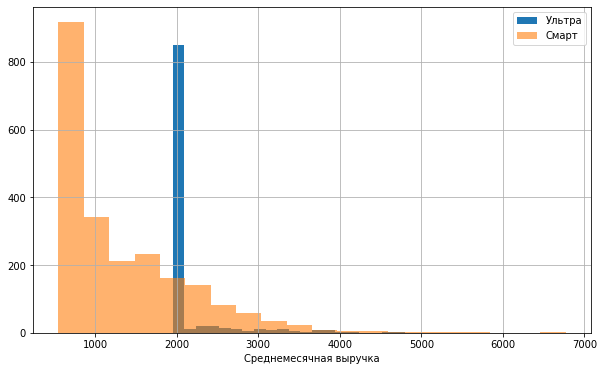

count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: monthly_profit, dtype: float64
2040000.0


In [30]:
revenue_ultra.hist(bins=20, label='Ультра', figsize=(10,6))
revenue_smart.hist(bins=20, alpha=0.6, label='Смарт')
plt.xlabel('Среднемесячная выручка')
plt.legend(loc='upper right')
plt.show()
print(revenue_ultra.describe())
print(revenue_ultra.sum())

In [31]:
#revenue_smart.hist(bins=20)
print(revenue_smart.describe())
print(revenue_smart.sum())

count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: monthly_profit, dtype: float64
2885751.0


Средняя выручка для пользователей тарифов «Ультра» и «Смарт» различается. Впрочем, это было достаточно очевидно даже просто по графикам.  

- средняя  пользователей из Москвы отличается от выручки пользователей из других регионов;

Нулевая гипотеза  средние выручки Москвы и всех остальных городов совпадают, альтернативная - они отличаются.
Здесь также работаем с гипотезой о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

p-значение:  0.531666503831252
Не получилось отвергнуть нулевую гипотезу


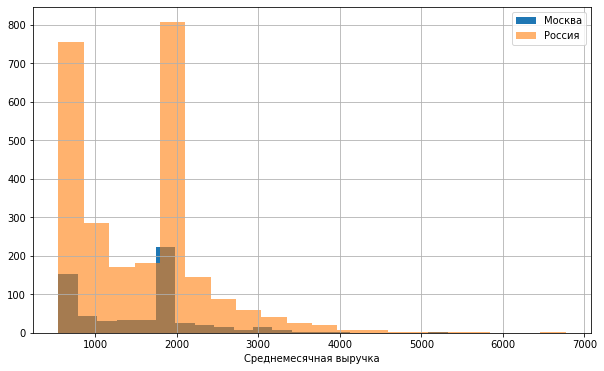

In [32]:
revenue_moscow = complete_data.loc[complete_data['city']=='Москва']['monthly_profit']
revenue_russia = complete_data.loc[complete_data['city']!='Москва']['monthly_profit']
#print(complete_data.loc[complete_data['city']=='Москва'].info())
#print(complete_data.loc[complete_data['city']!='Москва'].info())

alpha_cities = 0.05 #критический уровень статистической значимости

results_cities = st.ttest_ind(revenue_moscow, revenue_russia)
print('p-значение: ', results_cities.pvalue)

if (results_cities.pvalue < alpha_cities):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

revenue_moscow.hist(bins=20, label='Москва', figsize=(10,6))
revenue_russia.hist(bins=20, label='Россия', alpha=0.6)
plt.xlabel('Среднемесячная выручка')
plt.legend(loc='upper right')
plt.show()

### Вывод
Средняя выручка для пользователей тприфов «Ультра» и «Смарт» различается. 
А вот для жителей Москвы и остальных городов этого различия нет, несмотря на сложившееся мнение о более высоких доходах (и расходах) москвичей. Имеем пики в значениях, равных абонентской плате и нормальное распределение для остальных значений.

## Общий вывод
По итогам исследования можно подвести следующие итоги.
Подавляющее большинство (больше 75%) абонентов тарифа Ультра платят только абонентскую плату. Все их потребности в услугах мобильной связи покрываются включенным в тариф пакетом. Только немногие доплачивают за дополнительный интернет, число же использованных минут разговора (медиана 518 при 3000 включенных в тариф минут) и, особенно, смс (медиана 38 при 1000 включенных в тариф) абсолютно избыточно для среднестатистического клиента.

Посмотри на клиентов, использующих тариф Смарт. Казалось бы - они гораздо чаще доплачивают сверх тарифа за дополнительные минуты (это делает около трети абонентов) и за траффик (более половины абонентов!), то есть такие клиенты должны быть выгодны оператору. 

Но если мы взглянем на получаемый с клиентов доход, то поймем, что это не так. Медианная выручка на тарифе Смарт более чем вдвое ниже (медиана 959 против 1950), чем на тарифе Ультра!
При этом за эти деньги клиенты Смарта используют лишь на 20% меньше минут и на 15% меньше траффика, чем на гораздо более дорогом Ультра. 

Добавим, что хотя клиентов Смарт больше чем клиентов ультра в 2,2 раза, в сумме приносят они всего лишь на 35% больше денег, чем все клиенты тарифа Ультра.

#### По итогам исследования можем утверждать, что для компании "Мегалайн" тариф Ультра значительно выгоднее тарифа Смарт. Именно на продвижение тарифа Ультра следует потратить большую часть рекламного бюджета.